# Generating plots of the SE-FPLC Chromatograms (Fig 1e,f)

### Last Updated: 240405
### Author Qiu Chang Wu

## Import all packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os as os


## Define Context for Sizes
sns.set(font='Helvetica Neue',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'k',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'k',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'k',
 'xtick.bottom': True,
 'xtick.minor.visible': True,
 'xtick.color': 'k',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.minor.visible': True,
 'ytick.color': 'k',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False})
sns.set_context("paper", rc={"font.size":12,
                             "axes.titlesize":16,
                             "axes.labelsize":16,
                             "xtick.labelsize":14,
                             "ytick.labelsize":14,
                            },font_scale=2)


## Import Data

In [2]:
working_path = '/Users/qiuwu/Library/CloudStorage/OneDrive-HarvardUniversity/2018-2024 PhD Work - QW/Paper Writing/FC Fusion Paper/'
figure_path = 'Figures/Figure_1_data/Figure 1b,c/'
qw_001_file = '4_step_SEC_equilibration_collection_wash_200129_EXP_0062_211118_QW-1 001.csv'
qw_004_file = '4_step_SEC_equilibration_collection_wash_200129_QW4 001.csv'
save_figures_path = "/Figures/raw_figures/figure 1b"


In [4]:
qw_001 = pd.read_csv(working_path+figure_path+qw_001_file,encoding='UTF-16', sep='\t')
qw_004 = pd.read_csv(working_path+figure_path+qw_004_file,encoding='UTF-16', sep='\t')

## Adjust Units

The flow rate was 0.4 mL/minutes. As the data was in mLs, I divided the value by 0.4 to obtain minutes

In [5]:
qw_001_plot = qw_001.iloc[2:,:2]
qw_001_plot = qw_001_plot.rename(columns={"Chrom.1":"mL",
                            "Unnamed: 1":"au"})

## Adjust Units from mL to time
qw_001_plot.loc[:,'time'] = qw_001_plot.mL.astype(float)/0.4
qw_001_plot=qw_001_plot.astype(float)
qw_004_plot = qw_004.iloc[2:,:2]
qw_004_plot = qw_004_plot.rename(columns={"Chrom.1":"mL",
                            "Unnamed: 1":"au"})
qw_004_plot.loc[:,'time'] = qw_004_plot.mL.astype(float)/0.4
qw_004_plot=qw_004_plot.astype(float)

### Plot for Fc-mIL-17A

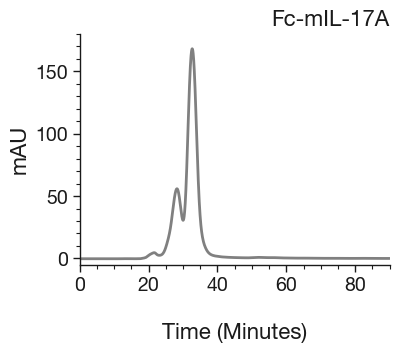

In [12]:
plt.figure(figsize=(4,3))
qw_004_run=qw_004_plot[qw_004_plot.mL>0]
ax=sns.lineplot(x="time",y='au', 
             data = qw_004_run,
                linewidth=2, color = 'grey')
plt.xlim([0,90])
plt.ylim([-5,180])
ax.set_ylabel("mAU")
ax.set_xlabel("Time (Minutes)",labelpad=20)
ax.set_title("Fc-mIL-17A",loc='right')
plt.savefig(working_path+save_figures_path+ "/fc-mIL-17A.pdf",
            bbox_inches="tight",dpi=200)

### Plot for Fc-hIL-17A

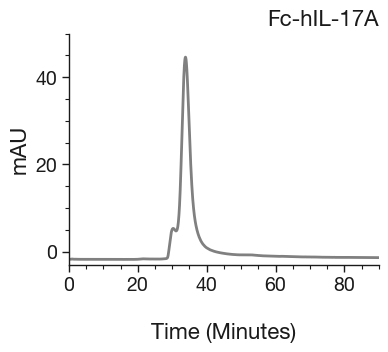

In [13]:
plt.figure(figsize=(4,3))
qw_001_run=qw_001_plot[qw_001_plot.mL>0]
ax=sns.lineplot(x="time",y='au', 
             data = qw_001_run,
                linewidth=2, color = 'grey')
plt.xlim([0,90])
plt.ylim([-3,50])
ax.set_ylabel("mAU")
ax.set_xlabel("Time (Minutes)",labelpad=20)
sns.despine(right = True)
ax.set_title("Fc-hIL-17A",loc='right')
plt.savefig(working_path+save_figures_path+ "/fc-hIL-17A.pdf",
            bbox_inches="tight",dpi=200)
